# Hospital Mortality Investigation
by Ariel Kuo, McKinley Pieper, and Jonathan Vergonio
CPSC 392-03

Our group wanted to investigate what predictors or health conditions can lead to in-hospital mortality, and provide recommendations/inform healthcare professionals about these vital signs. Our dataset had originally had 51 variables and 428 datapoints. Dataset was provided via Kaggle.

## Variables Description:
Variables
B= Boolean
C = Continuous
D = Decreate
CA= Categorical

Vital signs extracted were recorded during the ﬁrst 24 hours of each admission and laboratory variables were measured during the entire ICU stay

Outcome(B): Patience outcome  (0 Alive, 1 Dead)

Age(D): Age of patient at the time of hospital admission

Gender(CA): Gender 1 and Gender 2 (data set does not specify which gender is which)

BMI(C): Body Mass Index of patient at the time of hospital admission

Hypertensive(B): High Blood Pressure Low (0 = Doesn’t Have, 1 = Has)

Atrialfibrillation(B): irregular Heart Rhythm (0 = Doesn’t Have, 1 = Has)

CHD with no MI(B): Congenital heart defects with No Myocardial Infarction (0 = Doesn’t Have, 1 = Has)

Diabetes(B): (0 = Doesn’t Have, 1 = Has)

Deficiencyanemias(B): Iron deficiency (0 = Doesn’t Have, 1 = Has)

Depression(B): (0 = Doesn’t Have, 1 = Has)

Hyperlipemia(B): high cholesterol  (0 = Doesn’t Have, 1 = Has)

Renal failure(B): Inability of the kidneys to perform excretory function
leading to retention of nitrogenous waste products from the blood (0 = Doesn’t Have, 1 = Has)

COPD(B): Chronic Obstructive Pulmonary Disease (0 = Doesn’t Have, 1 = Has)

Heart rate(C): Heart Rate

Systolic blood pressure(C): Measures the pressure in your arteries when your heart beats.

Diastolic blood pressure(C): Measures the pressure in your arteries when your heart rests between beats.

Respiratory rate(C): Breathing rate

Temperature(C): Body temperature

SP O2(C): Saturation Pulse Oxygen: Blood Oxygen Levels

Urine output(C): Urine output in first 24 hours

Hematocrit(C):  The percentage by volume of red cells in your blood

RBC(C): Red Blood Cell Count

MCH(C): Mean Corpuscular Hemoglobin: A measurement of the average amount of hemoglobin in each red blood cell

MCHC(C): Mean Corpuscular Hemoglobin Concentration: A measure of the concentration of hemoglobin in red blood cell

MCV(C): Mean Corpuscular Volume: A measure of the average volume of a red blood corpuscle.

RDW(C): Red Blood Cell Distribution Width: Measures the differences in the volume and size of your red blood cells

Leucocyte(C): A cell that circulates in the blood and body fluids and is involved in counteracting foreign substances and disease; a white (blood) cell.

Platelets(C): Cells that form clots and stop or prevent bleeding

Neutrophils(C): White blood Cell that kills and digests bacteria and
fungi.

Basophils(C): White blood cells thats sound an alarm when infectious agents invade your blood.

Lymphocyte(C): White blood cell that creates antibodies to fight against bacteria, viruses, and other potentially harmful invaders.

PT(C): Prothrombin Time: Measures how long it takes for a clot to form in a blood sample.

INR(C): International Normalized Ratio: Calculation based off of PT

NT-proBNP(C): Heart failure by measuring the amount of BNP or its prohormone NT-proBNP in the bloodstream, respectively.

Creatine kinase(C): Measure of enzyme that's found in your skeletal muscle, heart muscle and brain

Creatinine(C): Measure of chemical waste product of creatine

Urea nitrogen(C): Measures the amount of urea nitrogen in your blood

Glucose(C): Measures blood sugar

Blood potassium(C): Measures blood potassium

Blood sodium(C):  Measures blood sodium

Blood calcium(C):  Measures blood calcium

Chloride(C): Measures Chloride(a type of electrolyte)

Anion gap(C): A way to check the acid-base balance (pH balance) of your blood.

Magnesium ion(C): Measure of water hardness

PH(C): Hydrogen Ion Concentration: The logarithm of the reciprocal of the hydrogen ion concentration in gram moles per liter

Bicarbonate(C): Measures how many millimoles of carbon dioxide is in a liter, or about a quart, of fluid (mmol/L)

Lactic acid(C): Measures the level of lactic acid made in the body

PCO2(C): The measure of carbon dioxide within arterial or venous blood.

EF(C or intervals): A measure of how much blood was pushed out of the left side of the heart

In [ ]:
#Importing necessary packages
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split # simple TT split cv

from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Data Loading and Cleaning
df = pd.read_csv("/content/data01.csv")
df = df.dropna()
#df.isnull().sum()
df.head()
df.shape

(428, 51)

# Question 1 (Logistic Regression)

## What are the most common health conditions that lead to in-hospital mortality?



In [ ]:
# Creating Train/Test Split for Logistic Regression
predictors = ['age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF']

continuous = ['age', 'BMI', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF']

X = df[predictors]
y = df["outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
df.head()

NameError: ignored

In [ ]:
# zscore
z = StandardScaler()

X_train[continuous] = z.fit_transform(X_train[continuous])
X_test[continuous] = z.transform(X_test[continuous])

#create
myLogit = LogisticRegression()
#fit
myLogit.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# metrics: Train Set
print("Accuracy: ", accuracy_score(y_train, myLogit.predict(X_train)))#myLogit.predict(X_train) predicted values for training set
print("F1 Score: ", f1_score(y_train, myLogit.predict(X_train)))
print("Recall: ", recall_score(y_train, myLogit.predict(X_train)))
print("Precision: ", precision_score(y_train, myLogit.predict(X_train)))

Accuracy:  0.9239766081871345
F1 Score:  0.6904761904761905
Recall:  0.5686274509803921
Precision:  0.8787878787878788


In [ ]:
#predict
predictedVals = myLogit.predict(X_test)
# metrics: Test Set
print("Accuracy: ", accuracy_score(y_test, predictedVals))
print("F1 Score: ", f1_score(y_test, predictedVals))
print("Recall: ", recall_score(y_test, predictedVals))
print("Precision: ", precision_score(y_test, predictedVals))

Accuracy:  0.8953488372093024
F1 Score:  0.6086956521739131
Recall:  0.5
Precision:  0.7777777777777778


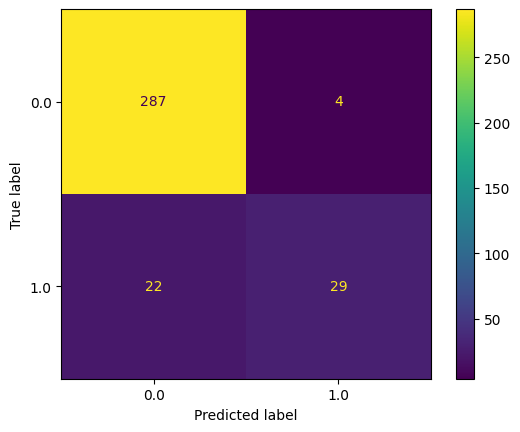

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, myLogit.predict(X_train))

The true negatives, as seen in the confusion matrix plot, illustrates that our model was able to guess 287 patients correctly in guessing a patient did not face hospital mortality when they also did not in reality. For the true positives, the model guessed 29 correct hospital mortality cases.
This shows a limitation in our model, as the logistic regression model does well in predicting true negatives but not true positives. Further steps would include trying other models such as a Decision Tree model or Random Forest. Other reasons could be due to the class imbalance as there are more individual who don't have hospital mortality than those who did in nature.

In [ ]:
#Receiving the log odds/odds coefficients for predictors
coef = pd.DataFrame({"Coef": myLogit.coef_[0], "Names": predictors})
coef = coef.append({"Coef": myLogit.intercept_[0], "Names": "intercept"}, ignore_index = True)
coef["Odds"] = np.exp(coef["Coef"])
coef.head()

,Coef,Names,Odds
0,0.513781,age,1.671600
1,0.030924,gendera,1.031407
2,0.058471,BMI,1.060214
3,0.322484,hypertensive,1.380553
4,-0.772856,atrialfibrillation,0.461693


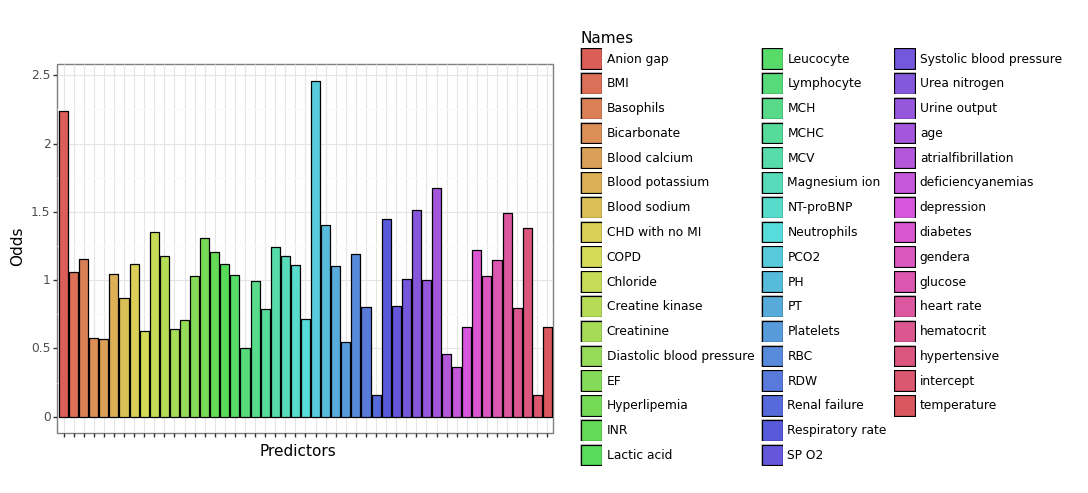

<ggplot: (8777273873418)>

In [ ]:
(ggplot(coef, aes(x = "Names", y = "Odds", fill = "Names" )) +
 geom_bar(stat = "identity",
          color = "black") +
 theme_minimal()+
 theme_bw()+
 labs(title = "",
      x = "Predictors",
      y = "Odds")+
 theme(axis_text_x = element_blank()))

The following Bar Graph shows all used 48 variables and the odds of how likely the patient will face hospital mortality. It is important to look at the 1.0 odds threshold, as this is the threshold that determines whether or not the predictor will cause an increase or decrease of likelihood in hospital mortality.

## Response to Question #1

The coefficients of each predictor allows us to observe the direct relationship between the predictor and the outcome variable, hospital mortality. For continuous variables, 1 unit increase would cause a patient to either be more or less likely of in-hospital mortality. For binary variables, we are able to observe what the increase/decrease of likelihood of in-hospital mortality if the patient did have that variable (0 vs. 1s).

To answer what common health conditions can lead to hospital mortality the most, the answer is hypertensive, diabetes, and hyperlipemia. This make sense as these are diseases can be caused in the long-term, and there isn't a direct treatment that could help treat these patients. For example, if a patient is hypertensive, their odds for hospital mortality is multiplied by 1.38. While there is no cure for high blood pressure, it is important to make effective lifestyle changes and possibly inquire about prescriptions of blood-pressure lowering medications from physicians.

For predictors that are less obvious to the general public, the highest continuous factors that lead to hospital mortality is PCO2 and Anion Gap predictors.
In this case it is PCO2 is the largest out of all of the variables. An increase in 1 PCO2 is associated with a 2.65x increase in your odds of in-hospital mortality. An elevated arterial partial pressure of carbon dioxide (pCO2) can lead to acute respiratory failure. This suggests respiratory acidosis, which is the failure of ventilation and accumulation of carbon dioxide.

Anion Gap could be highly related to PCO2, as Anion Gap measures the balance of pH in your blood. If the anion gap is too high, your blood is more acidic than normal. An elevated anion gap is known to be associated with hypertension, low cardiorepiratory fitness, and decreased renal function. Overall, 1 unit increase of an Anion Gap causes a patient's hospital mortality rate to be multiplied by 2.239. Therefore, PCO2 and Anion Gap levels are essential factors to be monitored by physicians.

# Question 2 (Cluster Analysis)

## When considering features BMI, glucose, and urine output, what clusters may emerge and how can we characterize those clusters?

After analyzing the data and observing that diabetes, hypertensive, and hyperlipemia are health conditions that could lead to in-hospital mortality, we wanted to further observe trends and clusters within patients who are diagnosed with diabetes. We used the BMI, glucose, an urine output predictors as we believe these predictors are correlated with diabetes after doing research.

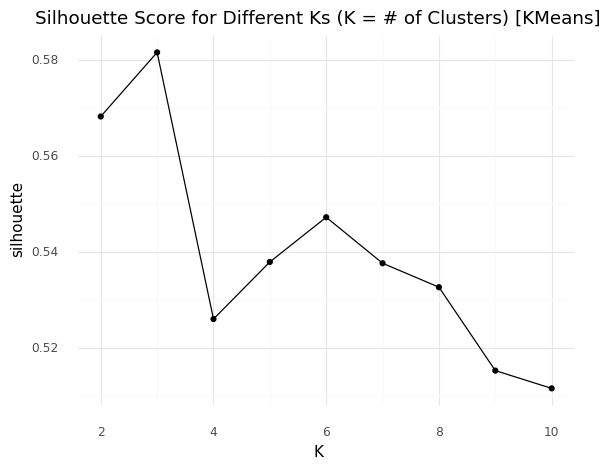

<ggplot: (8777273968394)>

In [ ]:
#KMeans cluster analysis is utilized
predictorsKMEANS = ['BMI', 'glucose', 'Urine output']

ks = [2,3,4,5,6,7,8,9,10]

#how far apart on avg are the datapoints from center of its cluster
#measure of cohesion
sil = []

for k in ks:
  #creating model
  km = KMeans(n_clusters = k)
  #fit
  km.fit(df[predictorsKMEANS])

  #inertia, SSEs for clusters avg dist from point and center
  sil.append(silhouette_score(df[predictorsKMEANS], km.predict(df[predictorsKMEANS])))

sse_df = pd.DataFrame({"K": ks,
                       "silhouette": sil})

(ggplot(sse_df, aes(x = "K", y = "silhouette")) +
 geom_line() + geom_point() +
 theme_minimal() +
 labs(title = "Silhouette Score for Different Ks (K = # of Clusters) [KMeans]"))

Three clusters will be used as it yields the highest silhouette score.

In [ ]:
#Creation of KMeans Model
km = KMeans(n_clusters = 3)

#Fitting the Features in KMeans
km.fit(df[predictorsKMEANS])

#Predicting Cluster labels
membership = km.predict(df[predictorsKMEANS])
df["Cluster"] = membership

#Finding Silhouette Score
print("Silhouette Score for KMeans:", silhouette_score(df[predictorsKMEANS],membership))

Silhouette Score for KMeans: 0.5816254350670362


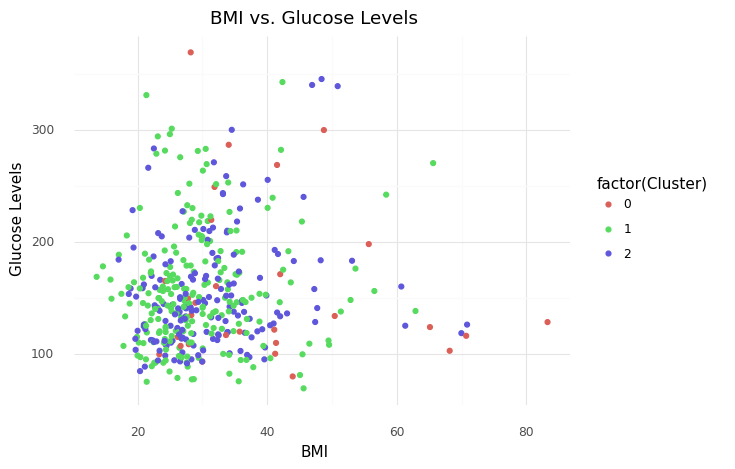

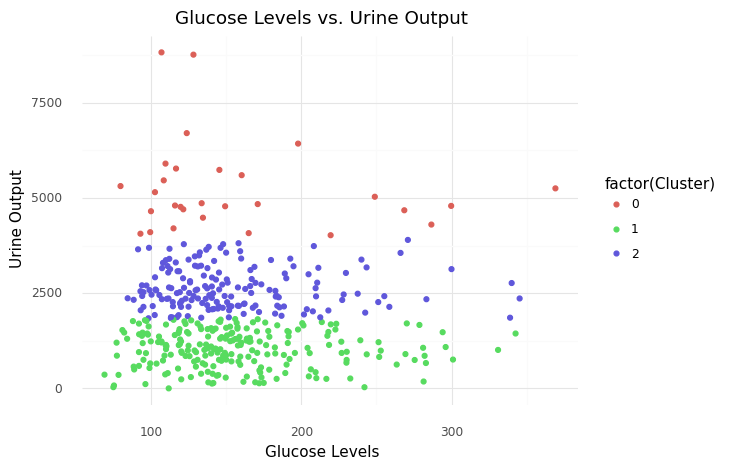

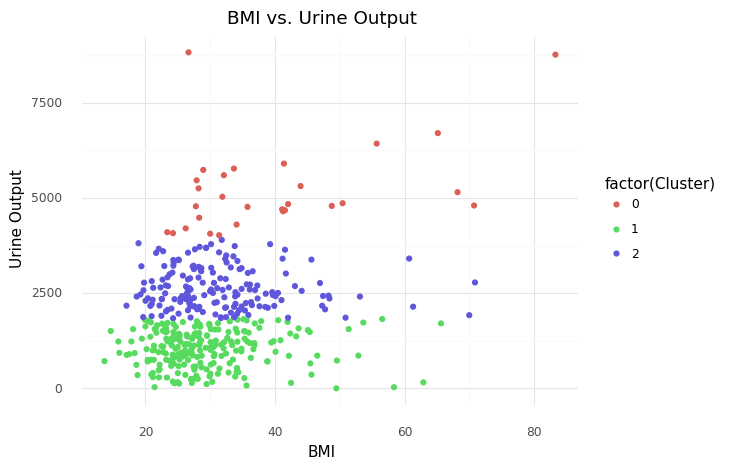

In [ ]:
#Print out of KMeans Cluster Analysis Graphs
print((ggplot(df, aes(x = "BMI", y = "glucose")) + geom_point(aes(color = "factor(Cluster)")) + theme_minimal() +
  labs(x = "BMI", y = "Glucose Levels") +
  ggtitle("BMI vs. Glucose Levels")))

print((ggplot(df, aes(x = "glucose", y = "Urine output")) + geom_point(aes(color = "factor(Cluster)")) + theme_minimal() +
  labs(x = "Glucose Levels", y = "Urine Output") +
  ggtitle("Glucose Levels vs. Urine Output")))

print((ggplot(df, aes(x = "BMI", y = "Urine output")) + geom_point(aes(color = "factor(Cluster)")) + theme_minimal() +
  labs(x = "BMI", y = "Urine Output") +
  ggtitle("BMI vs. Urine Output")))

## Response to Question #2


Overall, we had realized due to the limited amount of data available, our group clusters were not as cohesive and separate, leading to a silhouette score of approximately 0.58.

As we can see in the first graph, It is also important to note that there may not be an evident relationship between BMI and glucose. This could be because BMI does not distinguish between fat and muscle mass, which is a limitation as BMI as a variable.

From the other two graphs, We could categorize the red cluster as patients who are least likely to be diagnosed diabetes. The cluster is densely compact wherer there is regulated glucose levels, lower urine output, and mostly BMI's from 20-30.

The blue cluster are those who are more likely to be diagnosed with diabetes, as they have higher urine output, more outliers with a higher BMI, and patients that do have higher glucose levels.

The green clusters can be classified as patients who are most likely to be diagnosed with diabetes, as they are the outliers within the graph. This group has the highest urine output out of all of the clusters.
This is important as diabetes can affect the kidneys, which are responsible for filtering waste from the blood and producing urine. This can cause excessive urine output, which is a common symptom of uncontrolled diabetes.

It is essential for healthcare professionals to monitor urine output in relation to glucose and BMI to observe if the patient is at risk for diabetes, which can later prevent in-hospital mortality.

# Question 3 (Logistic Regression -- Comorbidities Analysis)

## Are there any differences in the predictive performance of a model in predicting hospital mortality specifically across different subgroups of patients, such as patients who are diagnosed with depression or other medical conditions or diseases (renal failure, diabetes, hypertensive)? With these subgroups of patients, how more or less likely will these patients face hospital mortality?

As we already know diabetes, hypertension, and hyperlipemia can lead to in-hospital mortality individually, it is important to note whether or not comorbidities (having one or more conditions that could lead to a higher risk of hospital mortality) has an effect on predictive performance. Depression, renal failure, diabetes, and hypertensive were used. Only 4 variables were used for computational efficiency, as it would be interesting to see how factors that may not lead to hospital mortality by themselves can increase predictive performance when combined with other diseases.
For example, does taking into account all 4 variables increase predictive performance?

In [ ]:
#5 Logistic Regression Models, NO Z-scoring since all are binary variables

X1 = df['depression'].values.reshape(-1, 1)
y1 = df['outcome']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state = 1)

#create
myLogit1 = LogisticRegression()
#fit
myLogit1.fit(X1_train, y1_train)

LogisticRegression()

In [ ]:
X2 = df['Renal failure'].values.reshape(-1, 1)
y2 = df['outcome']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state = 2)

myLogit2 = LogisticRegression()
myLogit2.fit(X2_train, y2_train)

LogisticRegression()

In [ ]:
X3 = df['diabetes'].values.reshape(-1, 1)
y3 = df['outcome']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state = 3)

myLogit3 = LogisticRegression()
myLogit3.fit(X3_train, y3_train)

LogisticRegression()

In [ ]:
X4 = df['hypertensive'].values.reshape(-1, 1)
y4 = df['outcome']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state = 4)

myLogit4 = LogisticRegression()
myLogit4.fit(X4_train, y4_train)

LogisticRegression()

In [ ]:
predictors = ['depression', 'Renal failure', 'diabetes', 'hypertensive']

X5 = df[predictors]
y5 = df['outcome']

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state = 5)

myLogit5 = LogisticRegression()
myLogit5.fit(X5_train, y5_train)

LogisticRegression()

In [ ]:
#predict
predictedVals1 = myLogit1.predict(X1_test)
predictedVals2 = myLogit2.predict(X2_test)
predictedVals3 = myLogit3.predict(X3_test)
predictedVals4 = myLogit4.predict(X4_test)
predictedVals5 = myLogit5.predict(X5_test)

# metrics
print("Accuracy (Depression): ", accuracy_score(y1_test, predictedVals1))
print("Accuracy (Renal Failure): ", accuracy_score(y2_test, predictedVals2))
print("Accuracy (Diabetes): ", accuracy_score(y3_test, predictedVals3))
print("Accuracy (Hypertensive): ", accuracy_score(y4_test, predictedVals4))
print("Accuracy (All): ", accuracy_score(y5_test, predictedVals5))

Accuracy (Depression):  0.8255813953488372
Accuracy (Renal Failure):  0.8604651162790697
Accuracy (Diabetes):  0.8604651162790697
Accuracy (Hypertensive):  0.8372093023255814
Accuracy (All):  0.813953488372093


In [ ]:
coef = pd.DataFrame({"Coef": myLogit5.coef_[0], "Names": predictors})
coef = coef.append({"Coef": myLogit5.intercept_[0], "Names": "intercept"}, ignore_index = True)
coef["Odds"] = np.exp(coef["Coef"])
print(coef)

       Coef          Names      Odds
0 -1.232983     depression  0.291422
1 -0.741782  Renal failure  0.476264
2 -0.005079       diabetes  0.994934
3 -0.004830   hypertensive  0.995182
4 -1.444756      intercept  0.235804


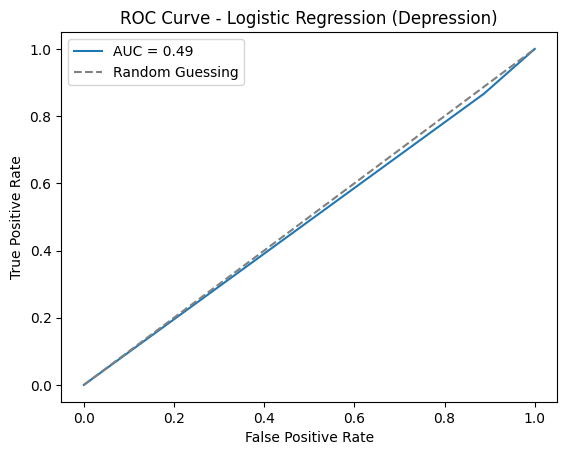

In [ ]:
# predicted probabilities for test set
probs1 = myLogit1.predict_proba(X1_test)
probs2 = myLogit2.predict_proba(X2_test)
probs3 = myLogit3.predict_proba(X3_test)
probs4 = myLogit4.predict_proba(X4_test)
probs5 = myLogit5.predict_proba(X5_test)

#keep only possitive class probabilities
probs1 = probs1[:, 1]
probs2 = probs2[:, 1]
probs3 = probs3[:, 1]
probs4 = probs4[:, 1]
probs5 = probs5[:, 1]

# calculate false positive rate, true positive rate and threshold values
fpr1, tpr1, thresholds1 = roc_curve(y1_test, probs1)
fpr2, tpr2, thresholds2 = roc_curve(y2_test, probs2)
fpr3, tpr3, thresholds3 = roc_curve(y3_test, probs3)
fpr4, tpr4, thresholds4 = roc_curve(y4_test, probs4)
fpr5, tpr5, thresholds5 = roc_curve(y5_test, probs5)

# calculate area under the curve (AUC)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
roc_auc5 = auc(fpr5, tpr5)

# plot ROC curve -- Depression

plt.plot(fpr1, tpr1, label=f'AUC = {roc_auc1:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Depression)')
plt.legend()
plt.show()

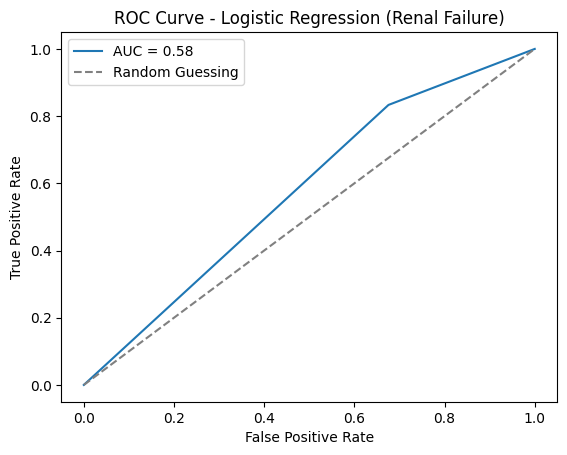

In [ ]:
#plot ROC curve -- Renal Failure
plt.plot(fpr2, tpr2, label=f'AUC = {roc_auc2:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Renal Failure)')
plt.legend()
plt.show()

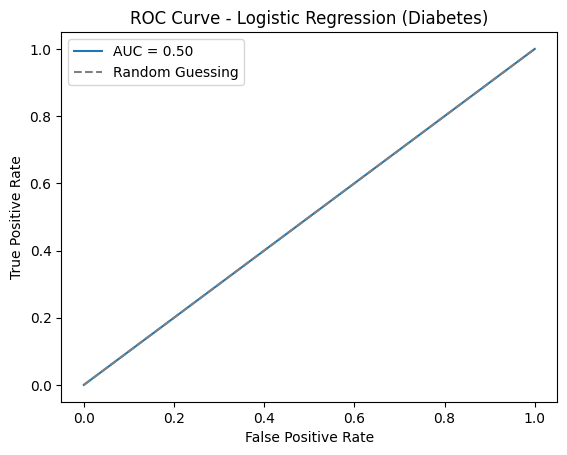

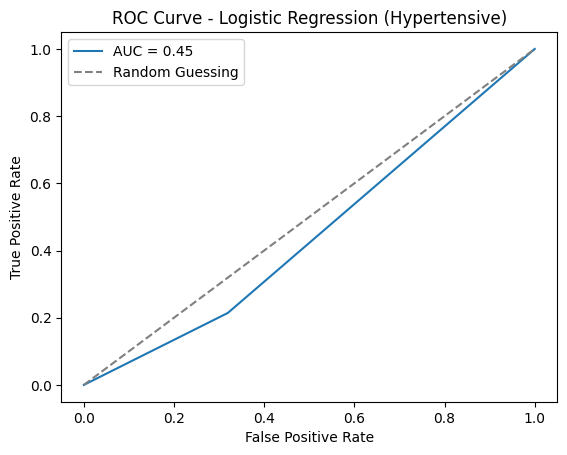

In [ ]:
#plot ROC curve -- Diabetes
plt.plot(fpr3, tpr3, label=f'AUC = {roc_auc3:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Diabetes)')
plt.legend()
plt.show()

#plot ROC curve -- Hypertensive
plt.plot(fpr4, tpr4, label=f'AUC = {roc_auc4:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Hypertensive)')
plt.legend()
plt.show()

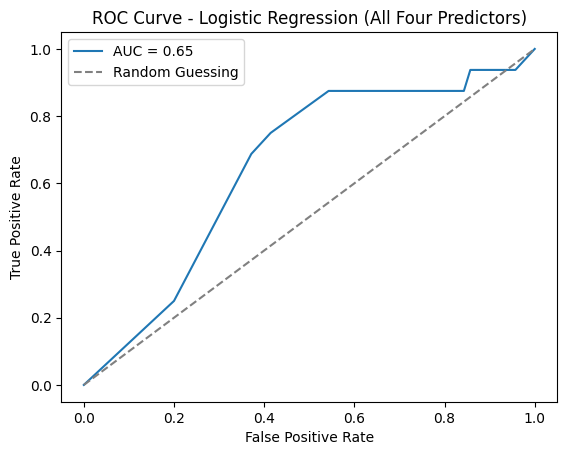

In [ ]:
#plot ROC curve -- All 4 Predictors
plt.plot(fpr5, tpr5, label=f'AUC = {roc_auc5:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (All Four Predictors)')
plt.legend()
plt.show()

## Response to Question #3:

*Disclaimer: plt plot was used as ggplot was not working.

Suprisingly, the outcomes renal failure and diabetes have increased model predictions as both had around 86% accuracy, while all four models had around 81% accuracy. This could be due to renal failure and diabetes being directly related, as failure of the kidneys could essentially lead to diabetes, and could lead to hospital mortality if left untreated. Depression and hypertensive were lower in accuracy than the first two mentioned, but were still higher than 81%.

It is important to note that having all four predictors had the highest ROC AUC score with 0.65. Even though the four variables may have had higher accuracy, the singular variables alone does not distinguish positive and negative cases well. (Only renal failure was higher than 0.5, which is random guessing). Therefore, it is important to include multiple diseases or comorbidities into the dataset, as it can really increase the models accuracy in specifically true positives and true negatives.

Other information we found: As we looked at the individual coefficients, we noticed that depression and renal failure has had a lower odds of in-hospital mortality. This may be because physicians are effectively providing treatment toward these subgroups when they are in the hospital. The odds are higher for diabetes and hypertensive, which indicates that these long-term diseases are difficult to treat when patients do arrive in the hospital, and could overall increase likelihood of hospital mortality.



# Question 4 (Prinicipal Component Analysis)

## How does the mean absolute error differ between the train and test data when using Principal Component Analysis on all continuous variables, and retaining enough Principle Components to keep 90% of the variance, to predict hospital mortality with our model(s)? How will creating prinicipal components give us more understanding of the structure of data and magnitude of influences that different variables may hold?


As we have realized our logistic regression model has a low sensitivity (predicting true positives), it may be essential to use more complex models such as Random Forests or Decision Trees, and have better cross validation methods such as KFold or Leave One Out.

Therefore, it is imperative for Dimensionality Reduction to occur to reduce our 48 variables down to usable variables that still keep 90% of the original variance. Although we did not implement a more complex model, this Principal Component Analysis (and creation of Principal Components) could be used for future plans.


In [ ]:
predictors = ['age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF']

contin = ['age', 'BMI', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF']

X = df[predictors]
y = df["outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# zscore
z = StandardScaler()

X_train[contin] = z.fit_transform(X_train[contin])
X_test[contin] = z.transform(X_test[contin])

In [ ]:
pca = PCA()
pca.fit(X_train)

#Creating Dataframe that will help us find # of PCS that explain 90% of irignal variance.
pcaDF = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_,
                      "pc": range(1,49),
                      "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF.head()

,expl_var,pc,cum_var
0,0.110861,1,0.110861
1,0.081857,2,0.192718
2,0.071281,3,0.263999
3,0.067548,4,0.331547
4,0.056565,5,0.388113


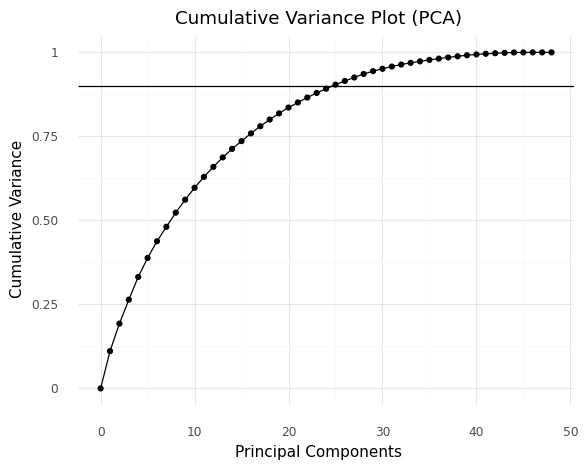

<ggplot: (8777278350126)>

In [ ]:
#Creating Cumulative Variance Plot
pcaDF = pcaDF.append(pd.DataFrame({"expl_var" : [0], "pc": [0], "cum_var": [0]}))
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line() + geom_point() + geom_hline(yintercept = 0.90) +
 labs(x = "Principal Components", y = "Cumulative Variance", title = "Cumulative Variance Plot (PCA)") +
 theme_minimal())

In [ ]:
#Creating component scores for both training and test set. (17Pcs)
pc_train = pca.transform(X_train)
pc25_train = pd.DataFrame(pc_train[:,0:25])

pc_test = pca.transform(X_test)
pc25_test = pd.DataFrame(pc_test[:,0:25])

#Create new Linear Regression Model
lr_pca = LogisticRegression()

#Fitting Model on train set
lr_pca.fit(pc25_train, y_train)

#Train/Test set Predicitons
PC_train = lr_pca.predict(pc25_train)
PC_test = lr_pca.predict(pc25_test)

#Printing Accuracy for Train/Test Sets with PCA
print("Accuracy for PCA Train Set: ", accuracy_score(y_train, PC_train))
print("Accuracy for PCA Test Set: ", accuracy_score(y_test, PC_test))

Accuracy for PCA Train Set:  0.8976608187134503
Accuracy for PCA Test Set:  0.872093023255814


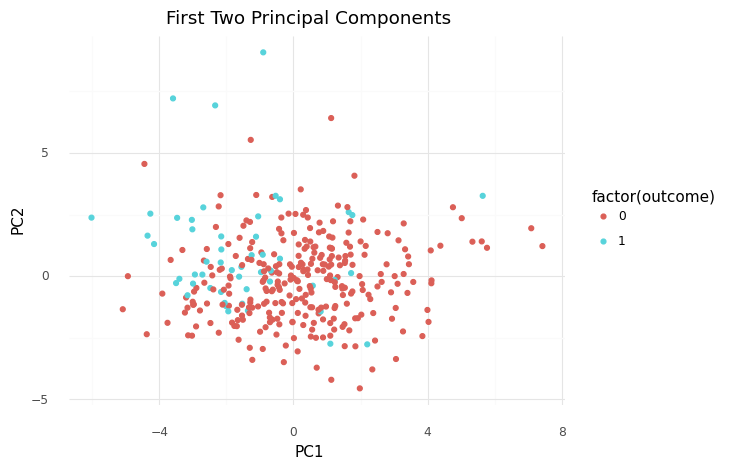

<ggplot: (8777278445403)>

In [ ]:
# create a dataframe with the first two PCs and outcome
pc_df = pd.DataFrame({"PC1": pc_train[:,0], "PC2": pc_train[:,1], "outcome": y_train})

# plot the first two PCs with outcome as color
(ggplot(pc_df, aes(x="PC1", y="PC2", color="factor(outcome)")) +
  geom_point() + labs(x="PC1", y="PC2", title="First Two Principal Components") +
 theme_minimal())

## Response to Question #4:

With principal component analysis, we were able to reduce our number of variables from 48 to 25, which still maintains 90% of the original variance. This cuts almost half of our variables, making variables more computationally efficient if we wanted to use PCs for more complex models.

The original logistic regression train/test accuracy scores were: 0.924 for the train set and 0.895 for the test set. When we applied PCA to reduce variables, the logistic regression (with PCA) train/test accuracy scores were: 0.897 for the train set and 0.872 for the test set. This is only a loss of 0.03 accuracy and still has great performance with only 25 principal components.

There is slight overfitting to both models, but not too significant that makes our logistic regression models unreliable. For future use, A decision tree model should be used with min_samples_leaf hyperparameter tuning to prevent overfitting. Principal Components could be added in random forests to increase computational efficiency.

Other information we have obtained: We are able to see the overall general structure of all of the data with the plot of the first two principal components. The datapoints are generally clustered in the center with few outliers around it. For future use, it may be important to pick a dataset with much more datapoints to observe if other clusters may arise.

# Question 5 (LASSO)

## Out of the 48 variables observed in the dataset (excluding ground and ID), how can we utilize the Regularization method LASSO to select which variables have the most impact in predicting hospital mortality?

Our group wanted to investigate LASSO as an alternative to Principal Component Analysis to observe which factors are relatively the most important in predicting hospital mortality. (Not including data loadings from all original values, but only taking into account the variables that have most impact on our outcome variable)

In [ ]:
predictors = ['age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF']

continuous = ['age', 'BMI', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF']

X = df[predictors]
y = df["outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
# z-score to make sure predictors are on the same scale
z = StandardScaler()

X_train[continuous] = z.fit_transform(X_train[continuous])
X_test[continuous] = z.transform(X_test[continuous])

In [ ]:
# LASSO
l = Lasso()

# pipeline
z = make_column_transformer((StandardScaler(), continuous), remainder = "passthrough")
pipe = make_pipeline(z,l)

# gridsearch
a = {"lasso__alpha": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 2, 3, 5]}
grid = GridSearchCV(pipe, a, scoring = "neg_mean_squared_error", cv = 5, refit = True)
grid.fit(X_train, y_train)

# evaluate model
print("PENALTY:", grid.best_estimator_.get_params()["lasso__alpha"])
print("TRAIN:", r2_score(y_train, grid.predict(X_train)))
print("TEST :", r2_score(y_test, grid.predict(X_test)))

PENALTY: 0.01
TRAIN: 0.3396888666530896
TEST : 0.3918317430757958


In [ ]:
coef = grid.best_estimator_.named_steps["lasso"].coef_
coef = pd.DataFrame({"Coefficients": coef, "Predictors": predictors})
coef.head()

,Coefficients,Predictors
0,0.033263,age
1,0.000000,gendera
2,0.023522,BMI
3,-0.000000,hypertensive
4,-0.010378,atrialfibrillation


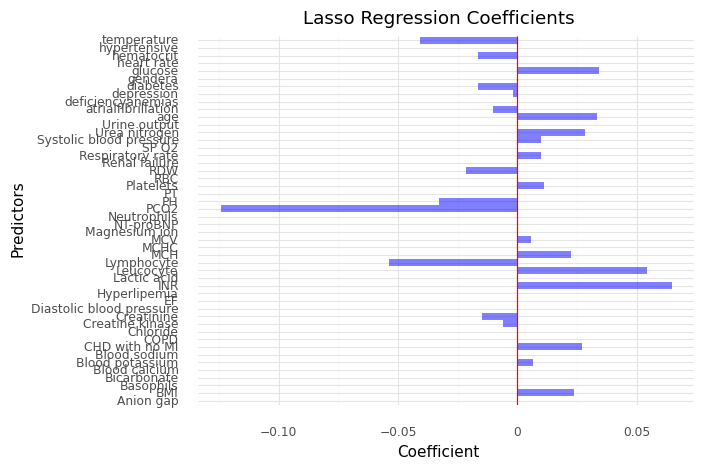

<ggplot: (8777273285326)>

In [ ]:
# create the ggplot graph
(ggplot(coef, aes(x = "Predictors", y = "Coefficients")) +
  geom_bar(stat = "identity", fill = "blue", alpha = 0.5) +
  geom_hline(yintercept = 0, color = "red") +
  coord_flip() +
  labs(title = "Lasso Regression Coefficients",
       x = "Predictors",
       y = "Coefficient") +
  theme_minimal())

In [ ]:
# linear regression
lr = LinearRegression()

lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

lr_coef = pd.DataFrame({"Coefficients": lr.coef_, "Predictors": predictors})
lr_coef.head()

,Coefficients,Predictors
0,0.039561,age
1,0.023019,gendera
2,0.001306,BMI
3,0.039203,hypertensive
4,-0.064545,atrialfibrillation


                              Type  Coefficients          Predictors
0               Lasso Coefficients      0.033263                 age
1               Lasso Coefficients      0.000000             gendera
2               Lasso Coefficients      0.023522                 BMI
3               Lasso Coefficients     -0.000000        hypertensive
4               Lasso Coefficients     -0.010378  atrialfibrillation
..                             ...           ...                 ...
91  Linear Regression Coefficients      0.030541                  PH
92  Linear Regression Coefficients      0.501124         Bicarbonate
93  Linear Regression Coefficients      0.017585         Lactic acid
94  Linear Regression Coefficients      0.107127                PCO2
95  Linear Regression Coefficients      0.011274                  EF

[96 rows x 3 columns]


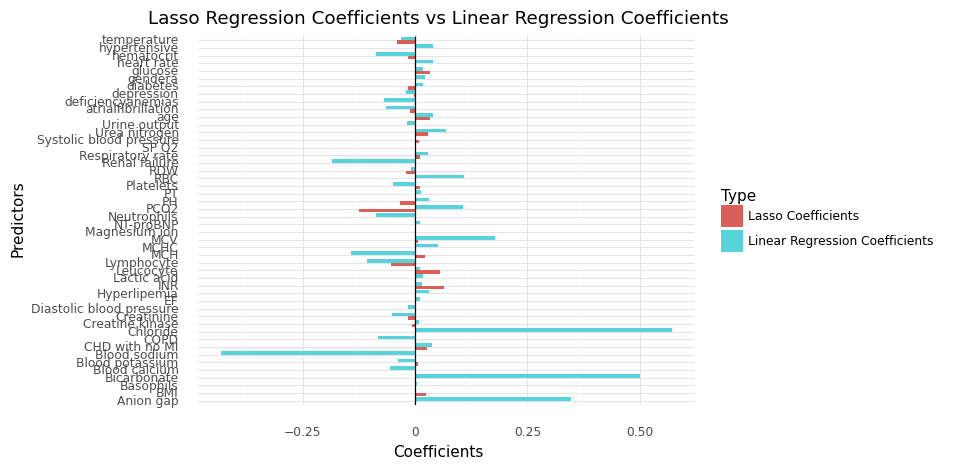

<ggplot: (8777266185277)>

In [ ]:
coef_type = pd.DataFrame({'Type' :  np.repeat(("Lasso Coefficients", "Linear Regression Coefficients"), 48)})
# print(coef_type)

coefs = [coef, lr_coef]
coef_df = pd.concat(coefs, ignore_index = True)
# print(coef_df)

coef_df = coef_type.join(coef_df)
print(coef_df)

(ggplot(coef_df, aes(x = "Predictors", y = "Coefficients", fill = "Type")) +
  geom_bar(stat="identity", position = position_dodge()) +
  geom_hline(yintercept = 0) +
  coord_flip() +
  labs(title = "Lasso Regression Coefficients vs Linear Regression Coefficients") +
  theme_minimal())

## Response to Question #5:

LASSO introduces the idea of penalty, represented by λ (aka lambda). This penalty is proportional to the sum of the absolute values of the coefficients. To avoid penalty, LASSO may shrink the variable coefficients to 0 if the features barely have any contribution to the model.

In our situation, we utilized LASSO to check which variables (excluding group and ID) are more impactful and which are less impactful when predicting in-hospital mortality. According to our calculation and the first bar graph, the coefficients of features "gender", "hypertensive", "Hyperlipemia", "Renal failure", "COPD", "heart rate", "Diastolic blood pressure", "SP O2", "Urine output", "RBC", "Neutrophils", "Basophils", "PT", "NT-proBNP", "Blood sodium", "Blood calcium", "Chloride", "Anion gap", "Magnesium ion", "Bicarbonate", "Lactic acid", and "EF" are shrunk to 0. With that said, these features are those that have less predictive power.

To demonstrate these shrinkage effects better, we also included another graph, comparing LASSO coefficients to Linear Regression coefficients. Some predictors that have high coefficients value with Linear Regression turn out to have very low or even 0 values with LASSO Regulation. However, there are some coefficients that have higher values with LASSO than Linear Regression. We did some research and found that LASSO may increase some coefficients to compensate for the shrinkage even with the penalty.

Other information we found: "Anion gap" was shrunk to 0, even though it was indicated to be one of the most crucial coefficients in our other models. This is probably because of the correlation between the "Anion gap" and "PC O2". It was surprising at first to see that Anion Gap was shrunk to 0 even if it had one of the highest coefficients. What we learned was that Anion Gap is highly related to PCO2, as both deal with explaining or affecting pH levels in the blood. Therefore, the LASSO model shrunk Anion Gap to 0 as it already was correlated to another variable PCO2, which was the highest coefficient in magnitude in predicting hospital mortality.

# Question 6

## How can healthcare providers and policymakers use the results of this study to improve healthcare outcomes and reduce costs?

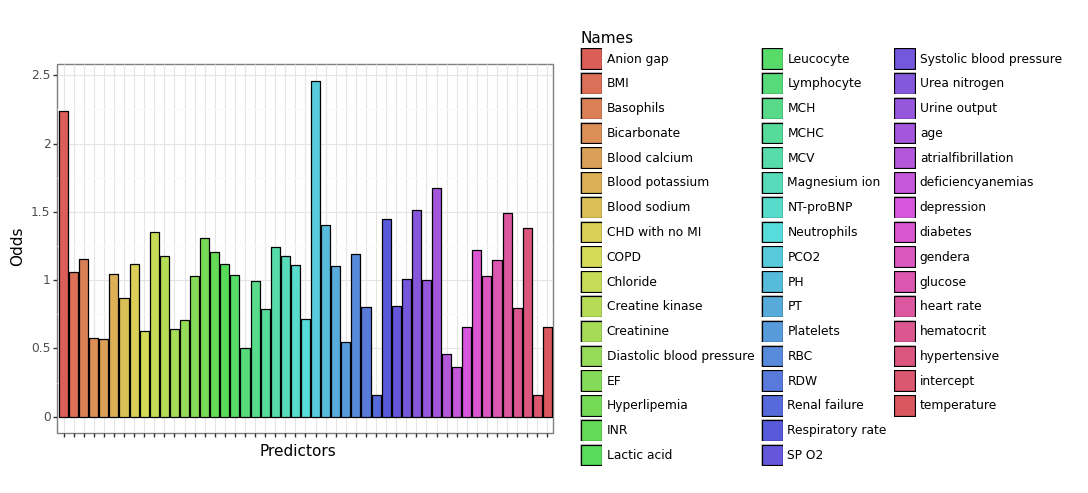

<ggplot: (8777266235465)>

In [ ]:
#Graph from Question 1: (Logistic Regression Coefficient Analysis)
coef = pd.DataFrame({"Coef": myLogit.coef_[0], "Names": predictors})
coef = coef.append({"Coef": myLogit.intercept_[0], "Names": "intercept"}, ignore_index = True)
coef["Odds"] = np.exp(coef["Coef"])

(ggplot(coef, aes(x = "Names", y = "Odds", fill = "Names" )) +
 geom_bar(stat = "identity",
          color = "black") +
 theme_minimal()+
 theme_bw()+
 labs(title = "",
      x = "Predictors",
      y = "Odds")+
 theme(axis_text_x = element_blank()))


## Reponse to Question #6:

A model that could predict hospital mortality could be greatly beneficial for multiple parties, including healthcare providers, policymakers, and patients. First and foremost, with the prediction model, healthcare providers could easily identify patients that are at higher risk. This could allow the providers to pay extra attention to these high-risk patients and provide interventions and treatment at an early stage. Additionally, the ability to identify patients could also help healthcare providers to reduce costs and allocate resources, such as doctor/nurse staffing, medicine, and hospital equipment more efficiently.

For example, we could use the logistic regression model from our first response to monitor the patients. According to the coefficient graph from our first response, we can see that features "PC O2" and "Anion gap" are some health conditions that increase the odds of mortality. With that said, healthcare providers could tag those patients with alarming levels of these factors as the model indicates that patients with high levels of these variables are at higher risk. Hospitals could delegate staffing and provide interventions/treatment for pH levels in blood more efficiently.

It is also important to note that health conditions as diabetes, hyperlipemia, and hypertensive are the health conditions/diseases that lead to the highest risk in-hospital mortality from the data we received. This indicates that patients facing long-term diseases are the most difficult to prevent/treat once they do arrive to the hospital. Therefore, regular check-ups with healthcare professionals must be emphasized to prevent this and there should be a push for research to investigate more effective treatments for patients that are in these subgroups.

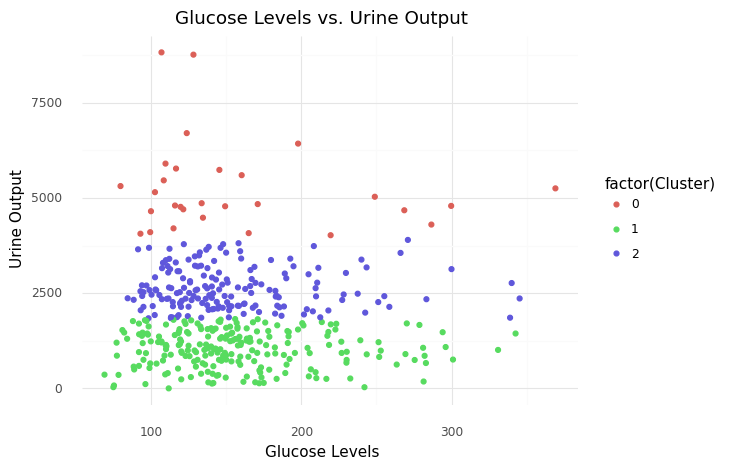

In [ ]:
# Graph #2: Clustering Analysis

print((ggplot(df, aes(x = "glucose", y = "Urine output")) + geom_point(aes(color = "factor(Cluster)")) + theme_minimal() +
  labs(x = "Glucose Levels", y = "Urine Output") +
  ggtitle("Glucose Levels vs. Urine Output")))

Another example, healthcare providers or policymakers could use the clustering model from our second response to study and develop pharmaceuticals for particular subgroups within the patients; In our graph we particularly investigated diabetes, but clustering analysis in hyperlipemia and hypertension should also be looked at. Based on the clustering graphs from our second response, we can characterize the patients and classify them into different groups. Those who are most at risk for diabetes, such as those with the highest urine output and are overall outliers, must be paid attention to and be given treatments in a timely manner. With the classification models, providers and policymakers can dive into patient groups, research their conditions for further purposes, and distribute appropriate resources and funds.

In conclusion, policymakers could utilize the results to make decisions on the distribution of funds to hospitals and healthcare providers. Moreover, they could also apply the prediction results to conduct research and push for the demand to develop medicine/treatments to certain subgroups facing various long-term medical conditions or diseases, as these conditions are the most at risk for in-hospital mortality.

In [ ]:
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/CPSC392_FinalProject.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "CPSC392_FinalProject.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
texlive is already the newest version (2019.20200218-1).
texlive-latex-extra is already the newest version (2019.202000218-1).
texlive-xetex is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes